In [2]:
##Importing Package
import numpy as np # The fundamental package for scientific computing with Python.
import time # for timming process

import lesbplume as lp # importing LESbplume and naming it at lp

# Data shape:
nx = 45
ny = 45
nz = 700

# Eulerian grid size:
dx = 40 #meter
dy = 40
dz = 10
dt = 30 #10s ever time step
D = 400 #meter

In [8]:
# Folder path and Name of the data
folder = r"C:\Users\thanh\OneDrive - University of Texas at San Antonio\Data\nbl.helium.h.2.0"
filename = "nbl_helium_h20" # nbl_helium_h20_T.mat

In [9]:
#LOADING DATA T and UVW data
name = folder+"\\"+filename
T = lp.loadmat(name+"_T.mat")
T = T*9.81/300 #converting to g'T
U = lp.loadmat(name+"_U.mat")
V = lp.loadmat(name+"_V.mat")
W = lp.loadmat(name+"_W.mat")

In [11]:
#Double Check Data
np.shape(T)

(45, 45, 700, 541)

4.7004786
wcmax:  4.7004786


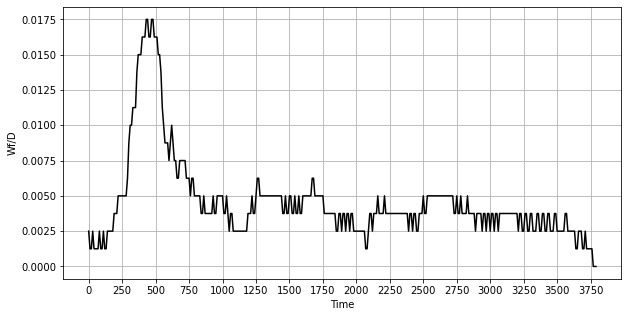

In [24]:
threshold = 0.0001
#Calculate the front velocity
uf = lp.frontvelocity(T,threshold,dt=10,dz=10,D=400) 
#plot front velocity
lp.frontvelocityplot(uf,filename,dt=10,marksize=250)

wcmax = lp.wcmax(W)
print("wcmax: ",wcmax)

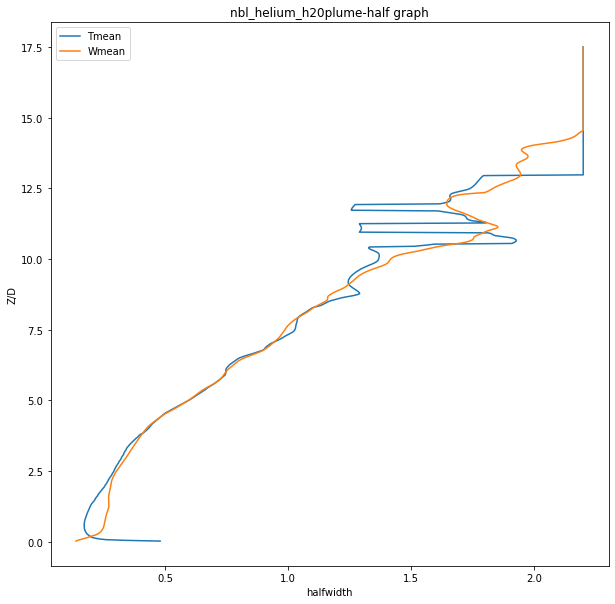

In [17]:
# Half-Plume Plot
lp.plumehalfgraph(W,T,filename,threshold=0.36788,dx=40,dy=40,dz=10,D=400)

In [18]:
#PROCESSING DATA (VORTEX IDENTIFICATION CRITERIONS) There are 3 of them. Lambda2 take very long time.

omega = lp.omega(U,V,W,dx,dy,dz) 
# helicity = lp.helicity(U,V,W,dx,dy,dz)
# lambda2 = lp.lambda2multicore(U,V,W,dx,dy,dz) #take long time


Omega Vortex Identification Completed


In [1]:
#Save Vortex ID Data 
lp.savemat(omega,filename+"VortexID")

NameError: name 'lp' is not defined

In [ ]:
# #PRE-PROCESSING DATA (PLUMHALFGRAPH)
# # Estimated time: ~1 minutes
# # Input (u,v,w,threshold,dx,dy,dz,D,graphname)
# threshold = 1/np.exp(1) #input threshold
# lp.plumehalfgraph(dataw,datat,name,threshold,dx,dy,dz,D)